In [1]:
from create_model import *


In [2]:
column_names = ['file', 'star', 'rank']
rank_6819 = pd.read_csv( '/Users/justycewatson/Desktop/CIERA_files/NGC6819/ngc6819_checkRes_all.txt',sep='\s+',names=column_names, skiprows=1)
rank_6819= rank_6819.drop('file', axis=1)

rank_6819

# rank 1 - good sampling (chain converges reasonably)
# rank 2 - poor sampling (no sampling or highly correlated)
# rank 3 - parts of chain seem convergent
# rank 4 - flat distribution 

,star,rank
0,2076220554197701504,4
1,2076220829075672960,4
2,2076220966514688128,3
3,2076224784750223232,4
4,2076227116907912960,4
...,...,...
1683,2076616859415037824,3
1684,2076617276038017664,4
1685,2076617447828109440,4
1686,2076617477890443008,2


In [22]:
directory = '/Users/justycewatson/Desktop/CIERA_files/NGC6819/ngc6819_single_resfiles' 
ngc6819_statistic = create_stats(directory)

ngc6819_clean, ngc6819_array = prepare_df_formodel(ngc6819_statistic)
ngc6819_array

with open('my_model.pkl', 'rb') as f:
    clf = pickle.load(f)

y_pred_6819 = make_preds(ngc6819_array, clf)

In [7]:
# Creating copies of the ypred array, rank df, and ngc6819 df so they wont be changed
y_pred_6819_copy = y_pred_6819.copy()
ngc6819_statistic_copy = ngc6819_statistic.copy()
rank_6819_copy = rank_6819.copy()


In [25]:
# ngc6819_statistic['source_id'] = ngc6819_statistic['source_id'].str.extract(r'gaia_(\d+)_sin2')
ngc6819_statistic['y_pred'] = y_pred_6819
ngc6819_statistic

,source_id,Width,Upper_bound,Lower_bound,Stdev,SnR,Dip_p,Dip_value,KS_value,KS_p,ESS,y_pred
0,2076279137552154112,1.611105,0.281932,0.241271,0.709164,12.619723,0.0,0.015125,0.163426,6.486647e-147,9939.808777,Bad
1,2076298933067389056,0.851659,0.281932,0.241271,0.492672,18.154950,0.0,0.075300,0.252794,0.000000e+00,9642.334882,Bad
2,2076584355102288128,1.568087,0.281932,0.241271,0.706918,12.674155,0.0,0.015795,0.166964,6.295490e-151,10057.347998,Bad
3,2076488525792609792,0.384405,0.281932,0.241271,0.494811,18.364221,0.0,0.052020,0.283429,0.000000e+00,9989.075802,Bad
4,2076581851147039232,1.684027,0.281932,0.241271,0.748072,11.787783,0.0,0.021270,0.175628,4.615690e-167,10161.519115,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1683,2076393834663325568,1.420736,0.281932,0.241271,0.685752,12.768550,0.0,0.009732,0.167092,1.337463e-153,9492.251909,Bad
1684,2076380400005524224,1.370467,0.281932,0.241271,0.686048,12.883365,0.0,0.021400,0.137004,1.467005e-101,9824.518586,Bad
1685,2076299895139969536,0.444381,0.281932,0.241271,0.175729,54.419198,0.0,0.085369,0.166827,6.757648e-152,9223.380297,Bad
1686,2076393662864610688,1.519873,0.281932,0.241271,0.696125,12.398271,0.0,0.016644,0.159283,1.538049e-139,9870.563787,Bad


In [26]:
y_pred_good = ngc6819_statistic[ngc6819_statistic['y_pred'] == 'Good']
y_pred_bad = ngc6819_statistic[ngc6819_statistic['y_pred'] == 'Bad']

In [28]:
y_pred_bad

,source_id,Width,Upper_bound,Lower_bound,Stdev,SnR,Dip_p,Dip_value,KS_value,KS_p,ESS,y_pred
0,2076279137552154112,1.611105,0.281932,0.241271,0.709164,12.619723,0.0,0.015125,0.163426,6.486647e-147,9939.808777,Bad
1,2076298933067389056,0.851659,0.281932,0.241271,0.492672,18.154950,0.0,0.075300,0.252794,0.000000e+00,9642.334882,Bad
2,2076584355102288128,1.568087,0.281932,0.241271,0.706918,12.674155,0.0,0.015795,0.166964,6.295490e-151,10057.347998,Bad
3,2076488525792609792,0.384405,0.281932,0.241271,0.494811,18.364221,0.0,0.052020,0.283429,0.000000e+00,9989.075802,Bad
4,2076581851147039232,1.684027,0.281932,0.241271,0.748072,11.787783,0.0,0.021270,0.175628,4.615690e-167,10161.519115,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1683,2076393834663325568,1.420736,0.281932,0.241271,0.685752,12.768550,0.0,0.009732,0.167092,1.337463e-153,9492.251909,Bad
1684,2076380400005524224,1.370467,0.281932,0.241271,0.686048,12.883365,0.0,0.021400,0.137004,1.467005e-101,9824.518586,Bad
1685,2076299895139969536,0.444381,0.281932,0.241271,0.175729,54.419198,0.0,0.085369,0.166827,6.757648e-152,9223.380297,Bad
1686,2076393662864610688,1.519873,0.281932,0.241271,0.696125,12.398271,0.0,0.016644,0.159283,1.538049e-139,9870.563787,Bad


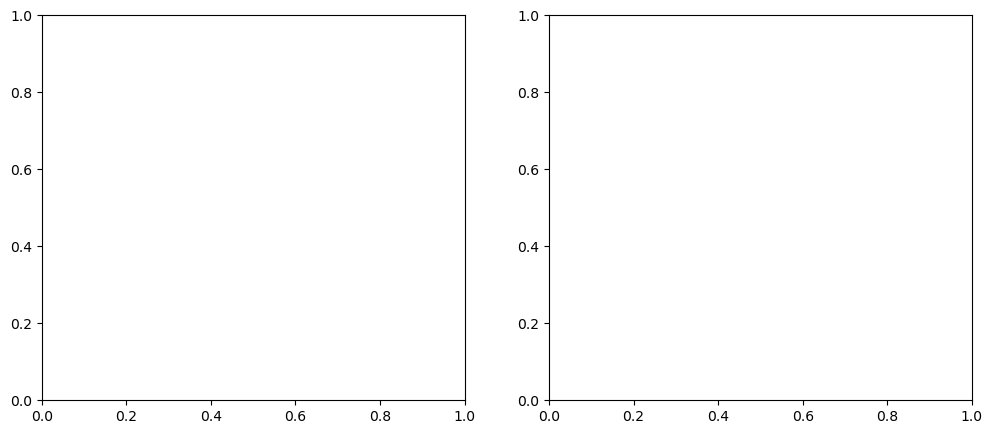

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

- .py file removes 'ngc2682_ etc' so the source id is just numbers
    - how would I change it for 6819 while keeping it the same for 2682? 